<a href="https://colab.research.google.com/github/Leothorn/EIP4/blob/master/Assignment_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data from Iris Dataset (Links to an external site.)  (1 point)
iris_data = load_iris() # load the iris dataset


iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],columns= iris_data['feature_names'] + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Encode all the categorical columns into numeric (1 point)
# -- Iris Setosa
# -- Iris Versicolour
# -- Iris Virginica
# mapped to 0 ,1,2

iris_df['target'].unique()

array([0., 1., 2.])

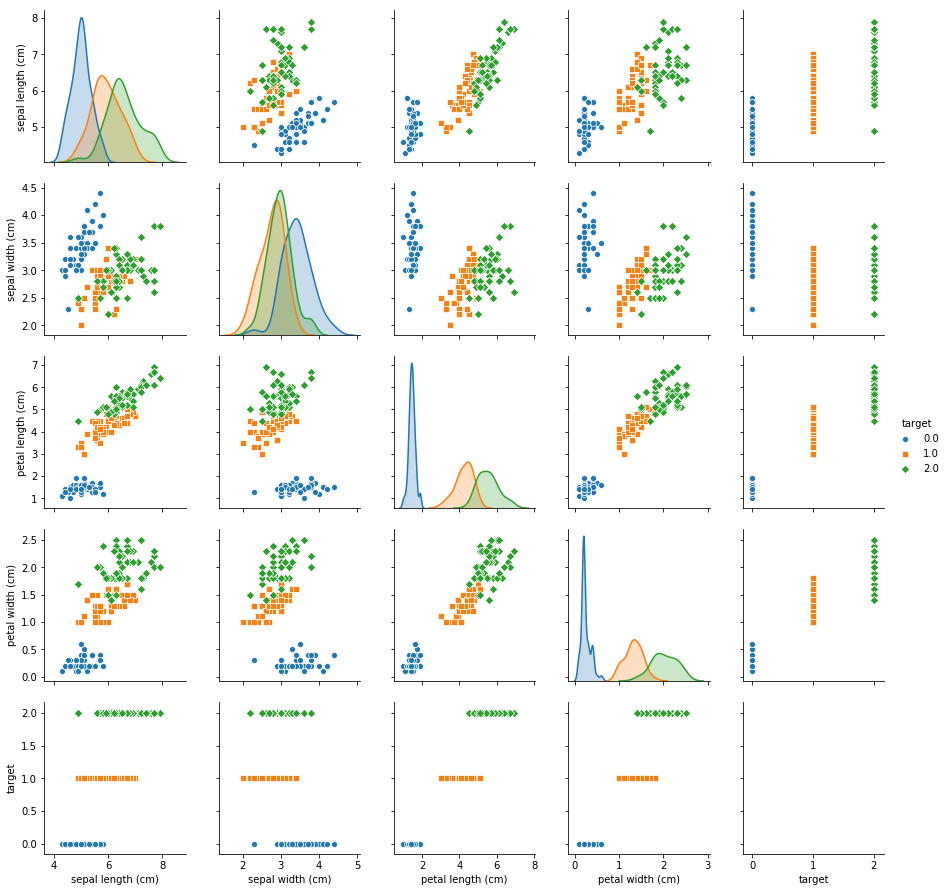

In [ ]:
# Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y. 
# Remove columns which don’t help the problem statement. (1 point)

X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = iris_df[['target']]

g = sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])


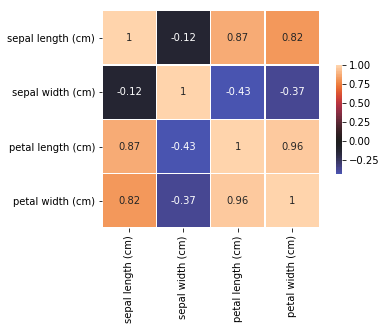

In [ ]:
corr = X.corr()
# From the correlplot its quite clear that sepal length and petal length have very high correlation and can be removed if needed
sns.heatmap(corr, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
# Do Feature Scaling on Independent variables (2 points)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(X) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)

# # One Hot encode the class labels
y_ = iris_data['target'].reshape(-1, 1) # Convert data to a single column
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
print(y)


After min max Scaling : 
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.1186440

C:\Users\ashwin.swarup\Anaconda3\envs\TF_CPU\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Split the data into train and test dataset (1 point)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)


In [ ]:
# Use Keras to make the neural network model and train the dataset on the same. (4 points)
# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=10, epochs=200)

Neural Network Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
 - 0s - loss: 0.7927 - acc: 0.7083
Epoch 2/200
 - 0s - loss: 0.4968 - acc: 0.9000
Epoch 3/200
 - 0s - loss: 0.3592 - acc: 0.9000
Epoch 4/200
 - 0s - loss: 0.2823 - acc: 0.9167
Epoch 5/200
 - 0s - loss: 0.2922 - acc: 0.9000
Epoch 6/200
 - 0s - loss: 0.2968 - acc: 0.8917
Epoch 7/200
 - 0s - loss: 0.2240 - acc: 0.9000
Epoch 8/200
 - 0s - loss: 0.2931 - acc: 0.8

In [ ]:
# Compute the accuracy and precision. (2 points)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , precision_score
pred_y = model.predict(test_x)


y_test_bool = np.argmax(test_y, axis=1)
y_pred_bool = np.argmax(pred_y, axis=1)

print(classification_report(y_test_bool, y_pred_bool))

print ( "Accuracy ",  accuracy_score(y_test_bool, y_pred_bool)*100.0)
print ( "Precision ", precision_score(y_test_bool, y_pred_bool, average='weighted')*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93         7
           2       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy  96.66666666666667
Precision  97.08333333333333
